## Title: Bike Details Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("BIKE DETAILS.csv")

1. What is the range of selling prices in the dataset ?

In [4]:
price_range = (df['selling_price'].min(), df['selling_price'].max())
print("1. Range of selling prices:", price_range)

1. Range of selling prices: (np.int64(5000), np.int64(760000))


In [5]:
# 2. Median selling price

median_price = df['selling_price'].median()
print("2. Median selling price:", median_price)

2. Median selling price: 45000.0


In [7]:
# 3. Most common seller type

most_common_seller = df['seller_type'].mode()[0]
print("3. Most common seller type:", most_common_seller)


3. Most common seller type: Individual


In [9]:
# 4. Bikes driven more than 50,000 km

bikes_over_50k = df[df['km_driven'] > 50000].shape[0]
print("4. Bikes over 50,000 km:", bikes_over_50k)

4. Bikes over 50,000 km: 170


In [10]:
# 5. Average km_driven by ownership type

avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print("5. Average km_driven by owner:\n", avg_km_by_owner)


5. Average km_driven by owner:
 owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


6. Proportion from 2015 or older (%): 56.64467483506126
7. Missing values:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
bike_age               0
depreciation         435
dtype: int64
8. Highest ex_showroom_price: 1278000.0 Bike: Harley-Davidson Street Bob
9. Bikes by seller type:
 seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64
10. Correlation for first-owner bikes: -0.24348174844965703
11. Outliers removed: 39
    Remaining rows: 1022


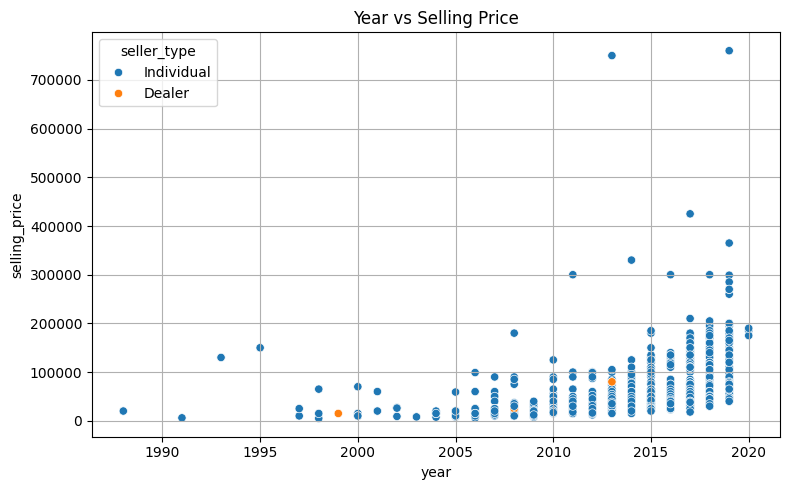

13. Average depreciation per year: 2666.561004095001
14. Bikes above average price:
 ['Royal Enfield Classic 350' 'Royal Enfield Classic Gunmetal Grey'
 'Yamaha Fazer FI V 2.0 [2016-2018]'
 'Royal Enfield Bullet 350 [2007-2011]' 'Yamaha YZF R3' 'Jawa 42'
 'Hero Honda Glamour' 'Yamaha YZF R15 S' 'Yamaha FZ25' 'Jawa Standard'
 'Royal Enfield Thunderbird 350' 'Honda CBR-250R' 'Bajaj Dominar 400'
 'KTM 390 Duke' 'Yamaha FZ16' 'Royal Enfield Electra 5 S'
 'Hero Honda Passion Plus' 'Royal Enfield Bullet 350'
 'Bajaj Pulsar 150 [2001-2011]' 'Hero Xtreme Sports'
 'Honda CB Hornet 160R' 'Royal Enfield Electra 4 S' 'Mahindra Mojo XT300'
 'Bajaj Pulsar AS200' 'Royal Enfield Thunderbird 350X'
 'Suzuki Intruder 150' 'Hero Honda Karizma ZMR [2010]'
 'Honda CB Unicorn 150' 'Hero Honda CD Deluxe'
 'Royal Enfield Classic Desert Storm' 'TVS Apache RTR 200 4V'
 'UM Renegade Commando' 'Royal Enfield Continental GT 650'
 'Honda Activa 3G' 'Harley-Davidson Street Bob'
 'KTM 390 Duke ABS [2013-2016]' 'KTM 20

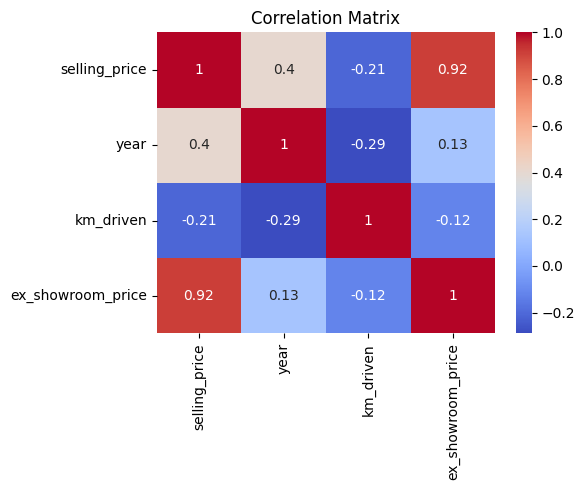

In [12]:
# 6. Proportion of bikes from 2015 or older

prop_2015_or_older = (df[df['year'] <= 2015].shape[0] / len(df)) * 100
print("6. Proportion from 2015 or older (%):", prop_2015_or_older)

# 7. Missing value trend

missing_values = df.isnull().sum()
print("7. Missing values:\n", missing_values)

# 8. Highest ex_showroom_price and bike

max_ex_price = df['ex_showroom_price'].max()
bike_max_ex = df.loc[df['ex_showroom_price'].idxmax(), 'name']
print("8. Highest ex_showroom_price:", max_ex_price, "Bike:", bike_max_ex)

# 9. Number of bikes by seller type

bikes_by_seller = df['seller_type'].value_counts()
print("9. Bikes by seller type:\n", bikes_by_seller)

# 10. Correlation (selling_price vs km_driven) for first-owner bikes

first_owner_df = df[df['owner'] == '1st owner']
correlation_first_owner = first_owner_df['selling_price'].corr(first_owner_df['km_driven'])
print("10. Correlation for first-owner bikes:", correlation_first_owner)


# 11. Remove outliers in km_driven (IQR method)

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[(df['km_driven'] >= Q1 - 1.5 * IQR) & (df['km_driven'] <= Q3 + 1.5 * IQR)]
print("11. Outliers removed:", len(df) - len(df_no_outliers))
print("    Remaining rows:", len(df_no_outliers))

# 12. Bivariate analysis: Year vs Selling Price

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='year', y='selling_price', hue='seller_type')
plt.title('Year vs Selling Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# 13. Average depreciation per year

current_year = 2025
df['bike_age'] = current_year - df['year']
df['depreciation'] = (df['ex_showroom_price'] - df['selling_price']) / df['bike_age']
avg_depreciation = df['depreciation'].mean(skipna=True)
print("13. Average depreciation per year:", avg_depreciation)

# 14. Bikes priced above average for their manufacturing year

year_avg_price = df.groupby('year')['selling_price'].mean()
above_avg_bikes = df[df.apply(lambda row: row['selling_price'] > year_avg_price[row['year']], axis=1)]['name'].unique()
print("14. Bikes above average price:\n", above_avg_bikes)

# 15. Correlation matrix & Heatmap

corr_matrix = df[['selling_price', 'year', 'km_driven', 'ex_showroom_price']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## Title: Car Sale Dataset

1. Average selling price by dealer:
 Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     2781

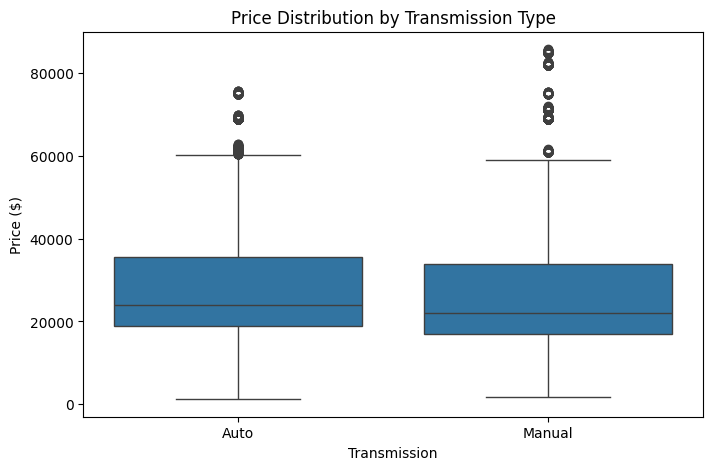

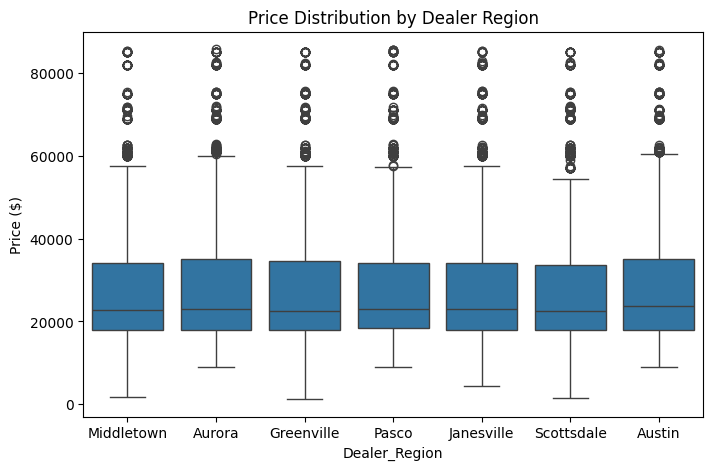

5. Distribution by body style:
 Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64
6. Average price by gender & annual income:
 Gender  Annual Income
Female  13500            28132.038732
        106000           46001.000000
        121000           20000.000000
        190000           19001.000000
        211000           51000.000000
                             ...     
Male    6600000          39000.000000
        6800000          15000.000000
        7650000          21000.000000
        8000000          85000.000000
        11200000         26001.000000
Name: Price ($), Length: 3442, dtype: float64


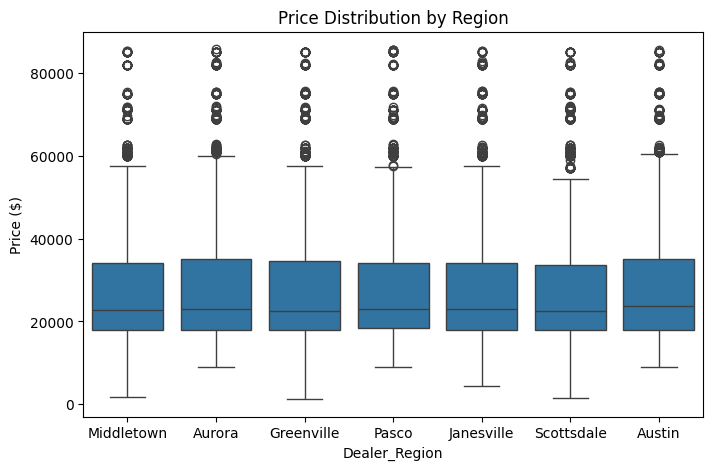

7. Cars sold by region:
 Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Greenville    3128
Middletown    3128
Name: count, dtype: int64
8. Average price by engine:
 Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


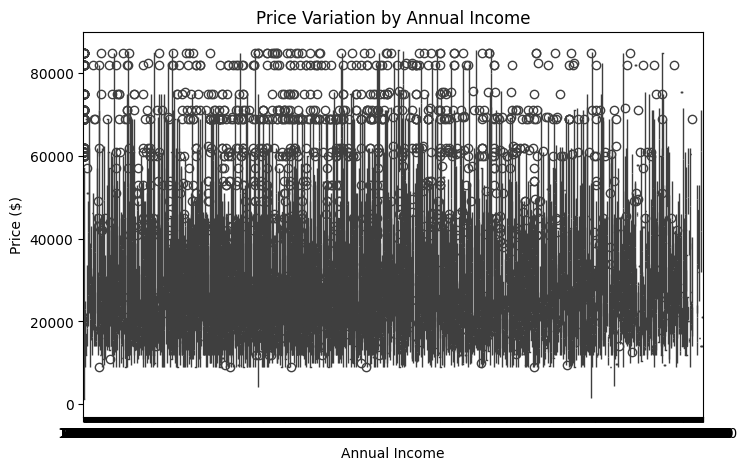

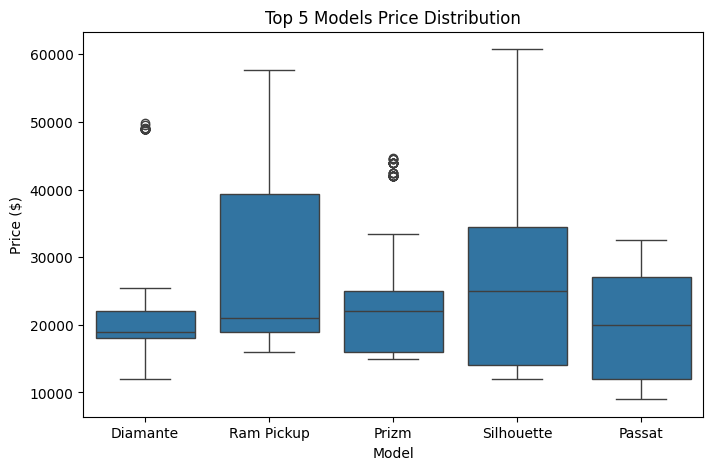

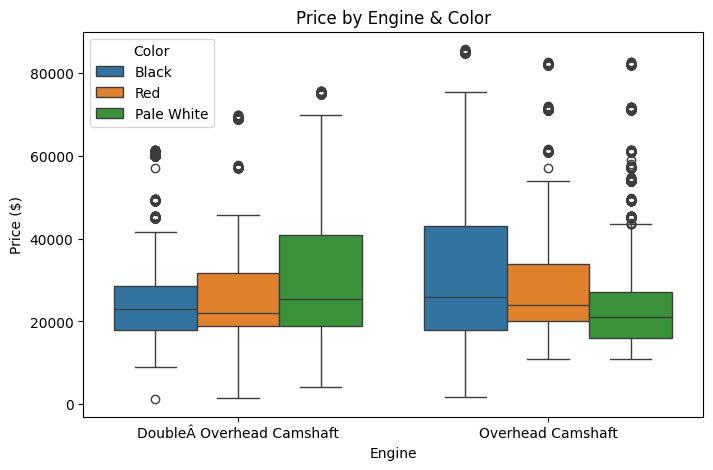

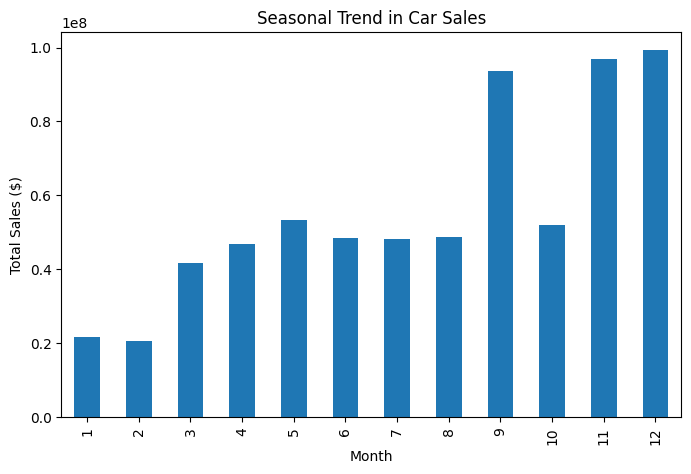

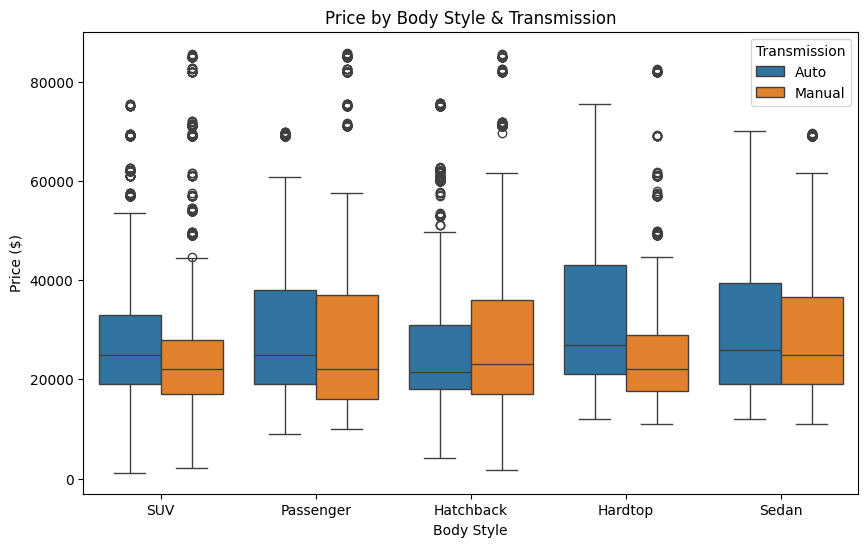

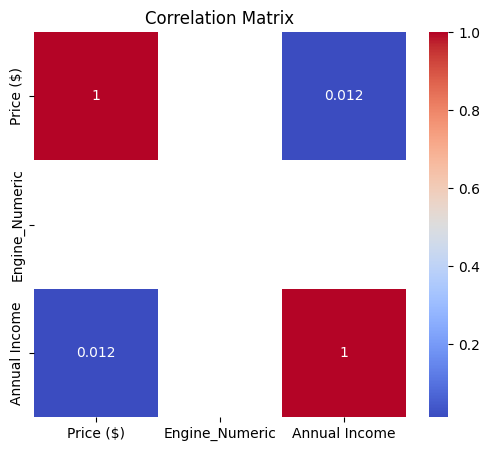

15. Average price by model & engine:
 Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price ($), Length: 261, dtype: float64


In [18]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Car Sale.csv")


# 1. Average selling price of cars for each dealer

avg_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean()
print("1. Average selling price by dealer:\n", avg_price_by_dealer)


# 2. Car brand with highest variation in prices

brand_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print("2. Brand with highest variation:\n", brand_variation)


# 3. Distribution of prices by transmission type

plt.figure(figsize=(8,5))
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Price Distribution by Transmission Type')
plt.show()

# 4. Distribution of prices across regions

plt.figure(figsize=(8,5))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Price Distribution by Dealer Region')
plt.show()


# 5. Distribution based on body style

body_style_counts = df['Body Style'].value_counts()
print("5. Distribution by body style:\n", body_style_counts)


# 6. Average selling price by gender & annual income

avg_price_gender_income = df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean()
print("6. Average price by gender & annual income:\n", avg_price_gender_income)


# 7. Price distribution by region and cars sold

plt.figure(figsize=(8,5))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Price Distribution by Region')
plt.show()
cars_sold_by_region = df['Dealer_Region'].value_counts()
print("7. Cars sold by region:\n", cars_sold_by_region)


# 8. Average price by engine size/type

avg_price_by_engine = df.groupby('Engine')['Price ($)'].mean()
print("8. Average price by engine:\n", avg_price_by_engine)


# 9. Price variation by annual income bracket

plt.figure(figsize=(8,5))
sns.boxplot(x='Annual Income', y='Price ($)', data=df)
plt.title('Price Variation by Annual Income')
plt.show()


# 10. Top 5 car models with highest sales & price distribution

top5_models = df['Model'].value_counts().head(5).index
plt.figure(figsize=(8,5))
sns.boxplot(x='Model', y='Price ($)', data=df[df['Model'].isin(top5_models)])
plt.title('Top 5 Models Price Distribution')
plt.show()

# -------------------------
# 11. Price variation with engine size by color
# -------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x='Engine', y='Price ($)', hue='Color', data=df)
plt.title('Price by Engine & Color')
plt.show()

# -------------------------
# 12. Seasonal trend in sales
# -------------------------
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['Price ($)'].sum()
plt.figure(figsize=(8,5))
monthly_sales.plot(kind='bar')
plt.title('Seasonal Trend in Car Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.show()

# -------------------------
# 13. Price distribution by body style & transmission
# -------------------------
plt.figure(figsize=(10,6))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title('Price by Body Style & Transmission')
plt.show()

# -------------------------
# 14. Correlation between price, engine size, and income
# -------------------------
# Extract numeric engine values if possible (e.g., "V6" -> 6)
df['Engine_Numeric'] = df['Engine'].str.extract(r'(\d+)').astype(float)
corr_matrix = df[['Price ($)', 'Engine_Numeric', 'Annual Income']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# -------------------------
# 15. Average price by car model & engine type
# -------------------------
avg_price_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean()
print("15. Average price by model & engine:\n", avg_price_model_engine)


## Amazon Sales Data

In [23]:
df = pd.read_csv("amazon.csv")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [24]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


1. Average Rating per Category:
 category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Computers&Accessories|Components|Memory                                                                          4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories

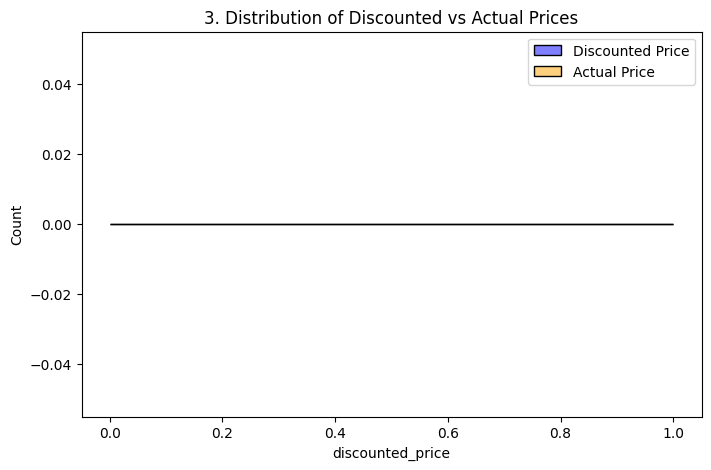


4. Average Discount % by Category:
 category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                   NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                  NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                          NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                       NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                          NaN
                                                                                                                          ..
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens       NaN
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplie

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("amazon.csv")

# Ensure numeric columns are in correct type
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# 1. Average rating for each product category
avg_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False)
print("\n1. Average Rating per Category:\n", avg_rating)

# 2. Top rating_count products by category (handling NaNs)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce').fillna(0)

top_rating_count = (
    df.loc[
        df.groupby('category', group_keys=False)['rating_count']
        .apply(lambda x: x.idxmax() if len(x) > 0 else None)
        .dropna()
        .astype(int)
    ]
)
print("\n2. Top rating_count products by category:\n", 
      top_rating_count[['category', 'product_name', 'rating_count']])


# 3. Distribution of discounted vs actual prices
plt.figure(figsize=(8,5))
sns.histplot(df['discounted_price'], color='blue', label='Discounted Price', kde=True)
sns.histplot(df['actual_price'], color='orange', label='Actual Price', kde=True)
plt.legend()
plt.title("3. Distribution of Discounted vs Actual Prices")
plt.show()

# 4. Average discount percentage by category
avg_discount = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
print("\n4. Average Discount % by Category:\n", avg_discount)

# 5. Most popular product names (by frequency)
popular_products = df['product_name'].value_counts().head(10)
print("\n5. Most Popular Product Names:\n", popular_products)

# 6. Most popular product keywords (using 'about_product')
popular_keywords = df['about_product'].value_counts().head(10)
print("\n6. Most Popular Product Keywords:\n", popular_keywords)

# 7. Most popular product reviews (using review_title)
popular_reviews = df['review_title'].value_counts().head(10)
print("\n7. Most Popular Product Reviews:\n", popular_reviews)

# 8. Correlation between discounted_price and rating
correlation = df['discounted_price'].corr(df['rating'])
print("\n8. Correlation between Discounted Price and Rating:", correlation)

# 9. Top 5 categories by highest ratings
top5_categories = avg_rating.head(5)
print("\n9. Top 5 Categories by Highest Ratings:\n", top5_categories)

# 10. Potential improvement areas (low rating, high price)
improvement_df = df.groupby('category').agg({
    'rating':'mean',
    'discounted_price':'mean'
}).sort_values('rating')
print("\n10. Categories for Improvement (Low Rating, High Price):\n", improvement_df)


## EDA - 4

In [27]:
df = pd.read_csv("spotify.csv")


In [28]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

Null values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Duplicate rows: 27


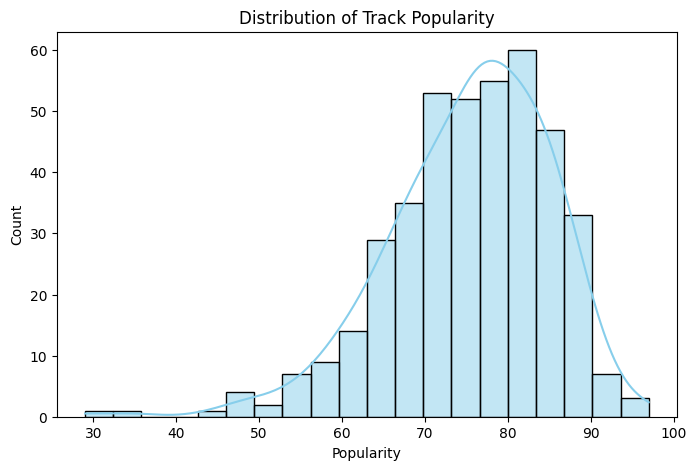

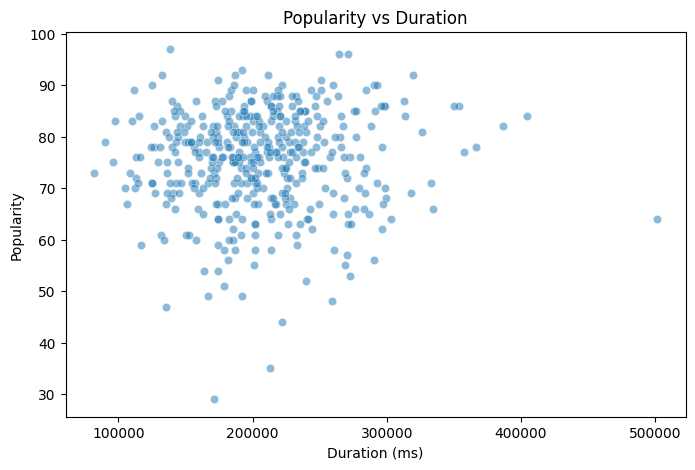

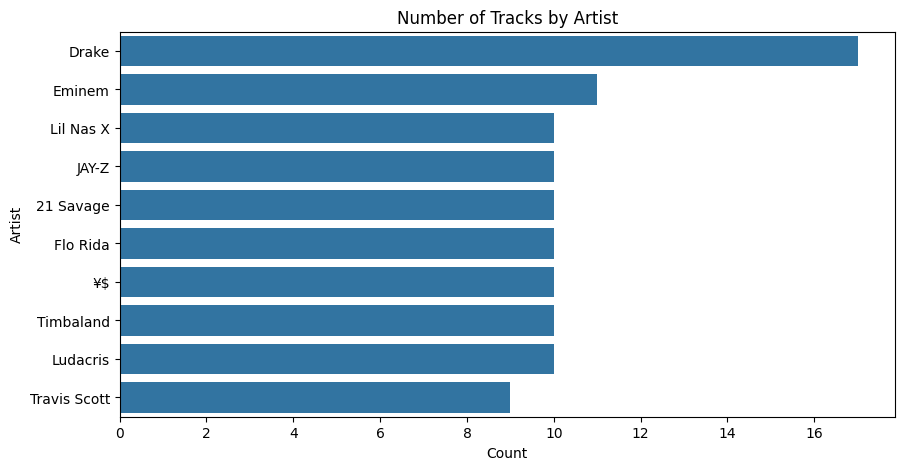


Top 5 Least Popular Tracks:
              Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48

Average Popularity of Top 5 Artists:
 Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64

Most Popular Track for Drake:
                                 Track Name  Popularity
0  Rich Baby Daddy (feat. Sexyy Red & SZA)          92

Most Popular Track for Eminem:
     Track Name  Popularity
80  Without Me          90

Most Popular Track for Lil Nas X:
             Track Name  Popularity
312  THATS WHAT I WANT          81

Most Popular Track for JAY-Z:
           Track Name  Popularit

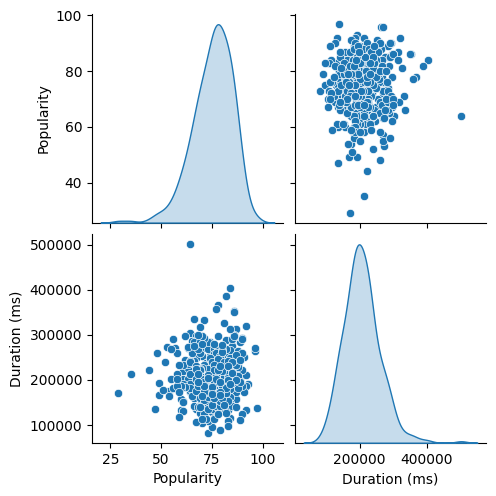

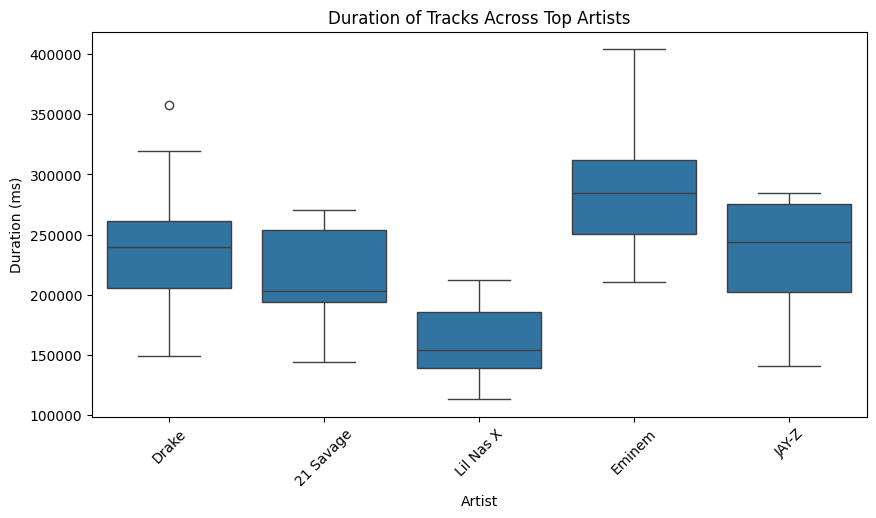

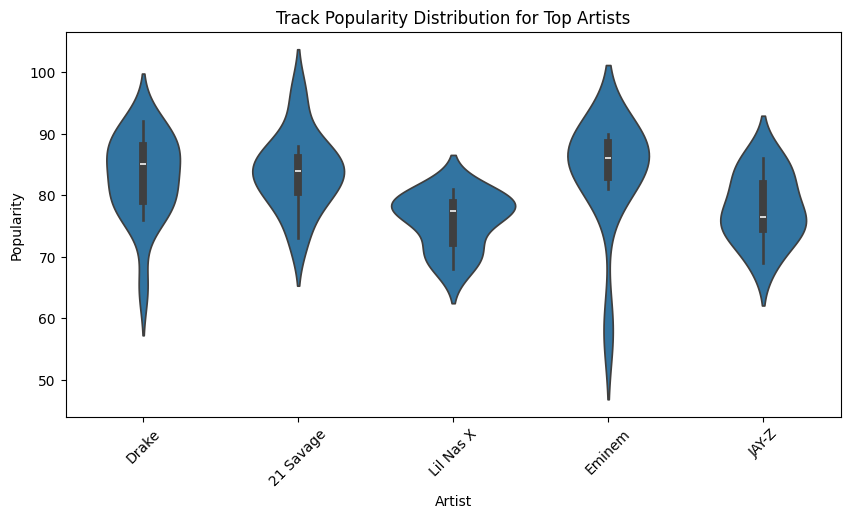

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read dataframe, check nulls, check duplicates
df = pd.read_csv("spotify.csv")

# Check null values
print("Null values:\n", df.isnull().sum())
df = df.dropna()  # Drop rows with missing values

# Check duplicates
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

# 2. Distribution of popularity
plt.figure(figsize=(8,5))
sns.histplot(df['Popularity'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

# 3. Popularity vs Duration
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity', alpha=0.5)
plt.title("Popularity vs Duration")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()

# 4. Artist with highest number of tracks
plt.figure(figsize=(10,5))
top_artists_count = df['Artist'].value_counts().head(10)
sns.countplot(y='Artist', data=df[df['Artist'].isin(top_artists_count.index)], order=top_artists_count.index)
plt.title("Number of Tracks by Artist")
plt.xlabel("Count")
plt.ylabel("Artist")
plt.show()

# 5. Top 5 least popular tracks
least_popular = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("\nTop 5 Least Popular Tracks:\n", least_popular)

# 6. Among top 5 most popular artists, highest average popularity
top5_artists = df['Artist'].value_counts().head(5).index
avg_popularity = df[df['Artist'].isin(top5_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print("\nAverage Popularity of Top 5 Artists:\n", avg_popularity)

# 7. Most popular track for each of the top 5 artists
for artist in top5_artists:
    top_track = df[df['Artist'] == artist].nlargest(1, 'Popularity')[['Track Name', 'Popularity']]
    print(f"\nMost Popular Track for {artist}:\n", top_track)

# 8. Pair plot of numerical variables
num_cols = df.select_dtypes(include='number').columns
sns.pairplot(df[num_cols].sample(min(500, len(df))), diag_kind='kde')
plt.show()

# 9. Duration variation across top artists (box plot)
plt.figure(figsize=(10,5))
sns.boxplot(x='Artist', y='Duration (ms)', data=df[df['Artist'].isin(top5_artists)])
plt.xticks(rotation=45)
plt.title("Duration of Tracks Across Top Artists")
plt.show()

# 10. Popularity distribution for top artists (violin plot)
plt.figure(figsize=(10,5))
sns.violinplot(x='Artist', y='Popularity', data=df[df['Artist'].isin(top5_artists)])
plt.xticks(rotation=45)
plt.title("Track Popularity Distribution for Top Artists")
plt.show()
